# Second Assignment: Exercise and a Personal Project

# Part 1 (Set Exercise) (out of 20 marks)

In this first part of Assignment 2, you are asked to continue work on the Iris dataset and further utilise libraries such as NumPy, Pandas and Matplotlib.

### Set up cells

In [1]:
## Let's import the libraries we are going to use later on
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Let's set the precision for NumPy and Pandas
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.2f}'.format

### Import iris dataset 

In [2]:
# Input:
# Import iris keeping the text column intact
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', 
                     names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'],
                     dtype=[np.float32, np.float32, np.float32, np.float32, '|S15']
)

### 1A. Produce some descriptive statistics for the iris dataset (5 marks)

For example, display the count of records, mean, std, min, max and in addtion to the quartiles for each of the columns.

In [3]:
# Write your solution here.
iris_df = pd.DataFrame(iris)
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### 1B. Calculate the maximum petal width for each species of flower (5 marks)

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,b'Iris-setosa'
1,4.90,3.00,1.40,0.20,b'Iris-setosa'
2,4.70,3.20,1.30,0.20,b'Iris-setosa'
3,4.60,3.10,1.50,0.20,b'Iris-setosa'
4,5.00,3.60,1.40,0.20,b'Iris-setosa'


In [5]:
# Write your solution here.
iris_df.groupby('species').max()['petal_width']

species
b'Iris-setosa'       0.60
b'Iris-versicolor'   1.80
b'Iris-virginica'    2.50
Name: petal_width, dtype: float32

### 1C. Data Visualisation (5 marks)

Produce a boxplot for each of the four columns of the iris dataset (sepal_length, sepal_width, petal_length and petal_width) in addition to the volume column (if you completed Assignment 1).

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', 
                     names=['sepal length', 'sepal width', 'petal length', 'petal width', 'species'],
                     dtype=[np.float32, np.float32, np.float32, np.float32, '|S15']
)

iris_data = np.array([list(row)[:4] for row in iris])
iris_label = np.array([list(row)[4] for row in iris])
pi = math.pi

#imdex : sepal length = 0, sepal width = 1, petal length = 2, petal width =3
volume = (pi*(iris_data[:,0]**2)*iris_data[:,2])/3
volume = volume[:,np.newaxis]

new_iris = np.hstack((iris_data, volume))

new_iris_df = pd.DataFrame(new_iris)
new_iris_df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width','Volume']

new_iris_df['Species'] = list(iris_label)

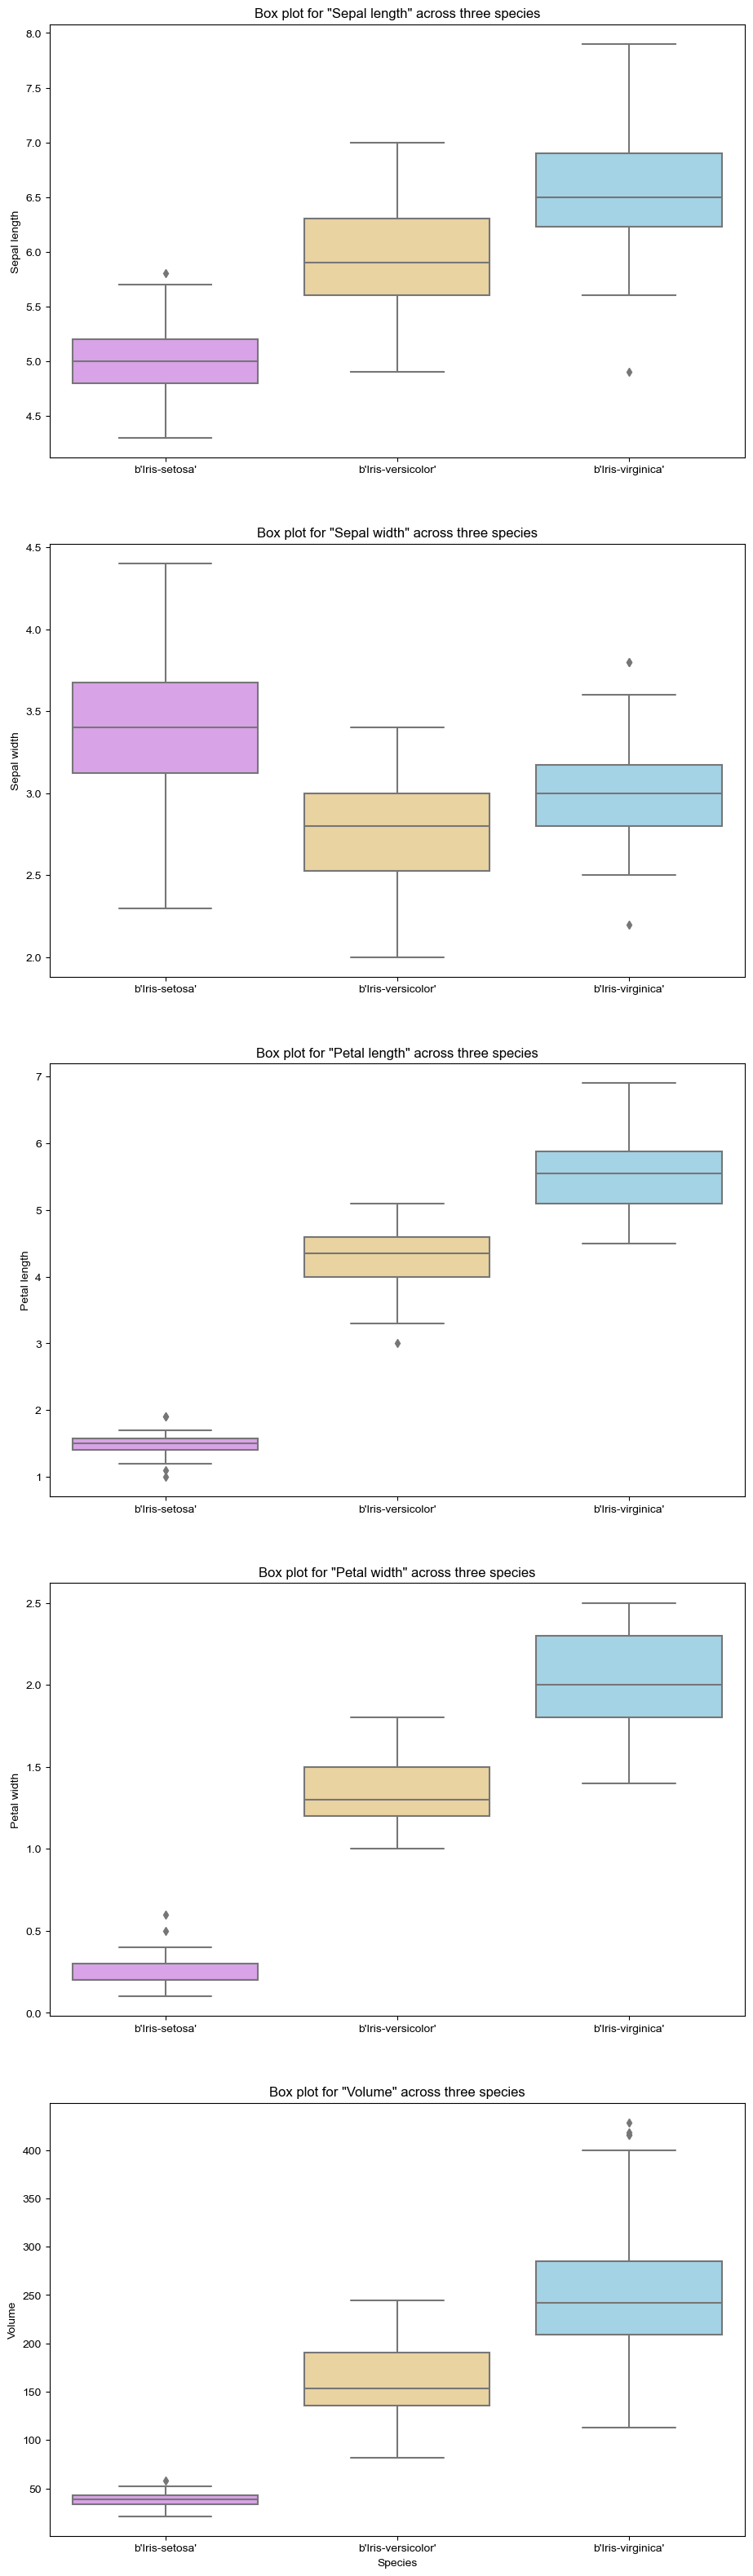

In [7]:
fig, axes = plt.subplots(5, 1, figsize=(11, 40), sharex=False)
for name, ax in zip(['Sepal length', 'Sepal width', 'Petal length', 'Petal width','Volume'], axes):
    custom_palette = ["#DF98F2", "#F5D795", "#99D8F1"]
    sns.boxplot(data=new_iris_df, x='Species', y=name, ax=ax, palette=custom_palette)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
    ax.set_title(f'Box plot for "{name}" across three species')
    sns.set_style("whitegrid")


### 1D. Provide a short intrepretation of the data visualised by your 1C solution. (5 marks)


The boxplot visualisation suggests that Iris Virginica has the largest average sepal length, petal width, volume, and petal length, while Iris Setosa has the smallest average across these four metrics. Also across these four metrics we see that Iris Virginica has the largest IQR, while Iris setosa has the smallest. The one category that does not follow this trend is the measurement of sepal width which shows Iris Setosa with the largest average, and Iris Veriscolor with the smallest average.

# Part 2 - Personal Project (out of 50 marks)
In this second part of Assignment 2 you have the opportunity to perform some data analysis on a dataset of your choice. Choose a dataset or a scenario that interests you and provide an outline of the scenario, clean the dataset (if needed), perform some statistic analysis, visualise this data analysis and comment on what you see.   

## Introduction to the Disney+ dataset (5 marks)

This is a dataset from kaggle, found at: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows?resource=download . This data set contains information on movies and series including their titles, directors, country of origin release dates and much more.

In [8]:
# Add setup code here - set the path to the chosen dataset, and import the relevant Python libraries.
disney_data = pd.read_csv('./datasets/disney_plus_titles.csv')
disney_data.sample(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
143,s144,Movie,Built for Mars: The Perseverance Rover,Mark J Davis,Steven French,NaN,"July 30, 2021",2021,TV-PG,88 min,Documentary,BUILT FOR MARS: THE PERSEVERANCE ROVER follows...
892,s893,Movie,Float,Bobby Rubio,"Eli Fucile, Bobby Rubio, Luna Watson, Mika Kubo",United States,"November 12, 2019",2019,PG,10 min,"Animation, Family, Fantasy","A father hides his unusual son, and then must ..."
1220,s1221,Movie,Steamboat Willie,"Walt Disney, Ub Iwerks",Walt Disney,United States,"November 12, 2019",1928,TV-Y7,8 min,"Animation, Family, Kids",Watch Mickey Mouse's classic cartoon debut. Se...
619,s620,Movie,Marvel's Iron Man & Hulk: Heroes United,Leo Riley,"Adrian Pasdar, Fred Tatasciore, David Kaye, De...",United States,"February 16, 2020",2013,PG,74 min,"Action-Adventure, Animation, Science Fiction",Avengers Iron Man and Hulk team up to fight an...
1179,s1180,Movie,Saving Mr. Banks,John Hancock,"Emma Thompson, Tom Hanks, Colin Farrell, Paul ...","United States, United Kingdom, Australia","November 12, 2019",2013,PG-13,129 min,"Biographical, Drama, Historical",Discover the untold story behind Walt Disney's...
393,s394,Movie,The Chronicles Of Narnia: The Voyage of the Da...,Michael Apted,"Georgie Henley, Skandar Keynes, Ben Barnes, Wi...","United States, United Kingdom","October 9, 2020",2010,PG,113 min,"Action-Adventure, Family, Fantasy",Three heroes sail with King Caspian to help Na...
367,s368,TV Show,Inside Pixar,NaN,NaN,United States,"November 13, 2020",2020,TV-PG,1 Season,"Docuseries, Family","An inside look at the people, artistry, and cu..."


In [9]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


Looking at this information we are missing a large amount of values from the 'director', 'cast', and 'country' columns, as well as a small number of 'rating' and 'date_added' data. 

Since the 'rating' and 'date_added' colums have such a small number of NaNs we will drop these rows, as well drop as the show_id column as this will not be useful in our analysis. Also, we will create a dataset with just movies and just tv shows as then we can convert the duration column into integer values which will be useful for our statistical analysis later on. We will then drop the type column, as we will have split them by tv and movies anyway. We will also cast the date_added column to a date time object.

In [10]:
disney_data_na_drop = disney_data.dropna(subset=['rating','date_added'])
disney_data_clean = disney_data_na_drop.drop('show_id', axis=1)
disney_data_clean['date_added'] = pd.to_datetime(disney_data_clean.date_added)

movies_disney_data = disney_data_clean[disney_data_clean['type'] == 'Movie']
movies_disney_data = movies_disney_data.reset_index(drop=True)
movies_disney_data['Duration (minutes)'] = movies_disney_data['duration'].str.split().str[0].astype(int)
movies_disney_data_clean = movies_disney_data.drop(['duration','type'], axis=1)

tv_disney_data = disney_data_clean[disney_data_clean['type'] == 'TV Show']
tv_disney_data = tv_disney_data.reset_index(drop=True)
tv_disney_data['Seasons'] = tv_disney_data['duration'].str.split().str[0].astype(int)
tv_disney_data_clean = tv_disney_data.drop(['duration','type'], axis=1)

In [11]:
movies_disney_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               1051 non-null   object        
 1   director            976 non-null    object        
 2   cast                932 non-null    object        
 3   country             946 non-null    object        
 4   date_added          1051 non-null   datetime64[ns]
 5   release_year        1051 non-null   int64         
 6   rating              1051 non-null   object        
 7   listed_in           1051 non-null   object        
 8   description         1051 non-null   object        
 9   Duration (minutes)  1051 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 78.1+ KB


In [12]:
tv_disney_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         393 non-null    object        
 1   director      0 non-null      object        
 2   cast          323 non-null    object        
 3   country       282 non-null    object        
 4   date_added    393 non-null    datetime64[ns]
 5   release_year  393 non-null    int64         
 6   rating        393 non-null    object        
 7   listed_in     393 non-null    object        
 8   description   393 non-null    object        
 9   Seasons       393 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 29.3+ KB


As the director column here is empty we will drop this column for just the tv shows.

In [13]:
tv_disney_data_clean = tv_disney_data_clean.drop(['director'], axis=1)

## 1. What was the most popular genre of TV shows added to Disney+ in 2021? Produce a visualisation to show how many shows were added across each month of 2021, and include plots for the number of shows added for the top 3 genres (15 marks)


In [14]:
tv_disney_data_clean.head()

,title,cast,country,date_added,release_year,rating,listed_in,description,Seasons
0,Hawkeye,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,2021-11-24,2021,TV-14,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,1
1,Port Protection Alaska,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2021-11-24,2015,TV-14,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...,2
2,Secrets of the Zoo: Tampa,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2021-11-24,2019,TV-PG,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...,2
3,"Dr. Oakley, Yukon Vet","Dr. Michelle Oakley, Zachary Fine",United States,2021-11-17,2013,TV-PG,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e...",10
4,Disney Fancy Nancy,"Mia Jenness, Alyson Hannigan, Rob Riggle, Spen...","United States, Canada",2021-11-12,2018,TV-PG,"Animation, Kids",Nancy makes every day extraordinary!,3


For this we will need to expand the 'listed_in' column so we have one genre per row in our df

In [15]:
tv_genre_df = tv_disney_data_clean.assign(Genre=tv_disney_data_clean['listed_in'].str.split(',')).explode('Genre')
tv_genre_df = tv_genre_df.drop(columns='listed_in')
tv_genre_df.reset_index(drop=True, inplace=True)

In [16]:
tv_2021 = tv_genre_df[tv_genre_df['date_added'].dt.year == 2021]
genre = tv_2021.value_counts('Genre').index[0]
number_of = tv_2021.value_counts('Genre')[0]
top_3_genre = tv_2021.value_counts('Genre').index[0:3]
print(f'The most popular genre amongst tv shows added in 2021 was {genre} and this had {number_of} shows added in 2021.')

The most popular genre amongst tv shows added in 2021 was Action-Adventure and this had 39 shows added in 2021.


C:\Users\Jennifer.Tossell\AppData\Local\Temp\ipykernel_18772\1020922231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_2021['Month'] = tv_2021['date_added'].dt.month


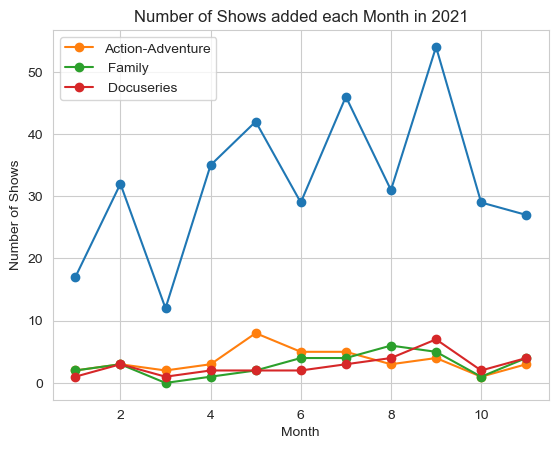

In [17]:
tv_2021['Month'] = tv_2021['date_added'].dt.month
monthly_counts = tv_2021.groupby('Month').size()
monthly_counts.plot(kind='line', marker='o')

genre_counts = tv_2021.pivot_table(index='Month', columns='Genre', aggfunc='size', fill_value=0)

for genre in top_3_genre:
    genre_counts[genre].plot(kind='line', marker='o', label=genre)

plt.xlabel('Month')
plt.ylabel('Number of Shows')
plt.title('Number of Shows added each Month in 2021')

plt.legend()
plt.show()

## 2. Find the top 3 longest movies across the genres 'Comedy', 'Animation', and 'Musical' and combine this into a single dataframe (15 marks)

In [18]:
# Add code here to answer this question
movies_disney_data_clean.head()

,title,director,cast,country,date_added,release_year,rating,listed_in,description,Duration (minutes)
0,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,"Animation, Family",Join Mickey and the gang as they duck the halls!,23
1,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,Comedy,Santa Claus passes his magic bag to a new St. ...,91
2,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,23
3,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,Musical,"This is real life, not just fantasy!",41
4,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,"Biographical, Documentary",An inside look at the legendary life of advent...,94


Again we need to explode the 'listed_in' column so we can can properly analyse the data. We will also dump the extra columns that we dont need for this piece of analysis

In [19]:
movie_genre_df = movies_disney_data_clean[['title','date_added', 'listed_in', 'Duration (minutes)']].assign(Genre=movies_disney_data_clean['listed_in'].str.split(',')).explode('Genre')
movie_genre_df = movie_genre_df.drop(columns='listed_in')
movie_genre_df.reset_index(drop=True, inplace=True)
movie_genre_df.head()

,title,date_added,Duration (minutes),Genre
0,Duck the Halls: A Mickey Mouse Christmas Special,2021-11-26,23,Animation
1,Duck the Halls: A Mickey Mouse Christmas Special,2021-11-26,23,Family
2,Ernest Saves Christmas,2021-11-26,91,Comedy
3,Ice Age: A Mammoth Christmas,2021-11-26,23,Animation
4,Ice Age: A Mammoth Christmas,2021-11-26,23,Comedy


In [20]:
genre_to_analyse = ['Comedy', 'Animation', 'Musical']

longest_movie_df = pd.DataFrame(columns=movie_genre_df.columns)

for item in genre_to_analyse:
    temp = movie_genre_df[movie_genre_df['Genre'] == item]
    top_3_index = temp['Duration (minutes)'].nlargest(3).index
    top_3 = temp.loc[top_3_index]
    longest_movie_df = pd.concat([longest_movie_df,top_3], axis = 0)

longest_movie_df.head(10)

,title,date_added,Duration (minutes),Genre
760,"Hello, Dolly!",2020-05-22,147,Comedy
2483,The Parent Trap,2019-11-12,129,Comedy
2486,The Parent Trap (1961),2019-11-12,129,Comedy
452,Dory's Reef Cam,2020-12-18,182,Animation
448,Arendelle Castle Yule Log,2020-12-18,180,Animation
1466,Fantasia,2019-11-12,126,Animation
321,Oklahoma!,2021-04-30,148,Musical
6,The Queen Family Singalong,2021-11-26,41,Musical


## 3. Convert some of the columns into a numerical representation and investigate any relationships between the data. What do the results sugggest? (15 marks)

In [21]:
movies_disney_data_clean.head()

,title,director,cast,country,date_added,release_year,rating,listed_in,description,Duration (minutes)
0,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,"Animation, Family",Join Mickey and the gang as they duck the halls!,23
1,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,Comedy,Santa Claus passes his magic bag to a new St. ...,91
2,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,23
3,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,Musical,"This is real life, not just fantasy!",41
4,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,"Biographical, Documentary",An inside look at the legendary life of advent...,94


In [22]:
movies_disney_data_clean['rating'].unique()

array(['TV-G', 'PG', 'TV-PG', 'PG-13', 'G', 'TV-14', 'TV-Y', 'TV-Y7-FV',
       'TV-Y7'], dtype=object)

Following a quick google search I have categorised the ratings into family friendly or not, items that are not friendly include TV-Y7-FV, which is used to indicate that a program contains “fantasy violence” that may be more intense or combative than other TV-Y7 programs, where TV-Y7 indicates that programming is designed for children ages 7 and older..

In [26]:
movies_disney_data_clean['IsAmerican?'] = (movies_disney_data_clean['country'].str.contains('United States'))
movies_disney_data_clean['IsAmerican?'] = (movies_disney_data_clean['IsAmerican?'] .fillna(0)).astype(int)
movies_disney_data_clean['Released_2000_onward?'] = (movies_disney_data_clean['release_year'] > 1999).astype(int)
movies_disney_data_clean['IsFamilyFriendly?'] = (movies_disney_data_clean['rating'].isin(['TV-G', 'PG', 'TV-PG', 'G', 'TV-Y'])).astype(int)
movies_disney_data_clean['Description_over_50_char?'] = (movies_disney_data_clean['description'].str.len() > 50).astype(int)

In [27]:
numerical_columns = movies_disney_data_clean.select_dtypes(include=['number'])
numerical_columns.head()

,release_year,Duration (minutes),IsAmerican?,Released_2000_onward?,IsFamilyFriendly?,Description_over_50_char?
0,2016,23,0,1,1,0
1,1988,91,0,0,1,0
2,2011,23,1,1,1,0
3,2021,41,0,1,1,0
4,2021,94,1,1,0,1


<Axes: >

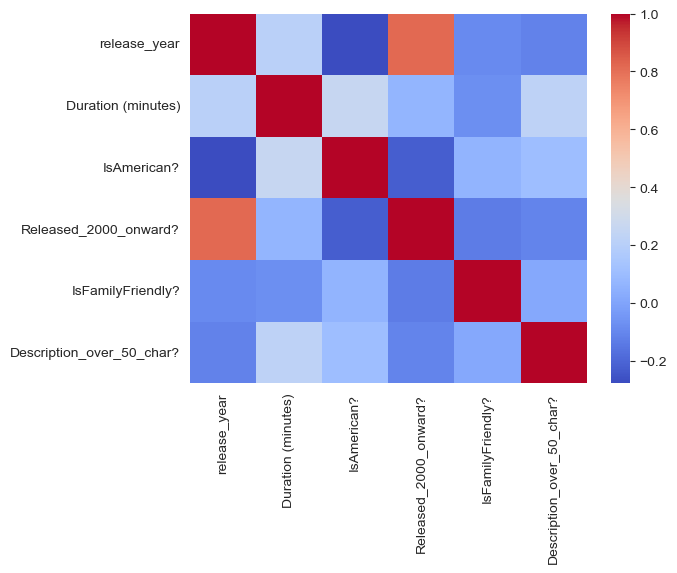

In [28]:
sns.heatmap(numerical_columns.corr(),cmap='coolwarm')

This suggests that the majority of our movies are released from the 2000s onwards, which we will now investigate with a line graph. To do this we will convert the years so that they represent the decade they were released in, and then we will plot this.

In [29]:
def year_to_decade(year):
    return year // 10 * 10

movies_disney_data_clean['Decade_released'] = movies_disney_data_clean['release_year'].apply(year_to_decade)
year_counts = movies_disney_data_clean['Decade_released'].value_counts()
sorted_year_counts = year_counts.sort_index(ascending=True)
sorted_year_counts

Decade_released
1920      1
1930     36
1940     41
1950     48
1960     29
1970     33
1980     41
1990    109
2000    243
2010    326
2020    144
Name: count, dtype: int64

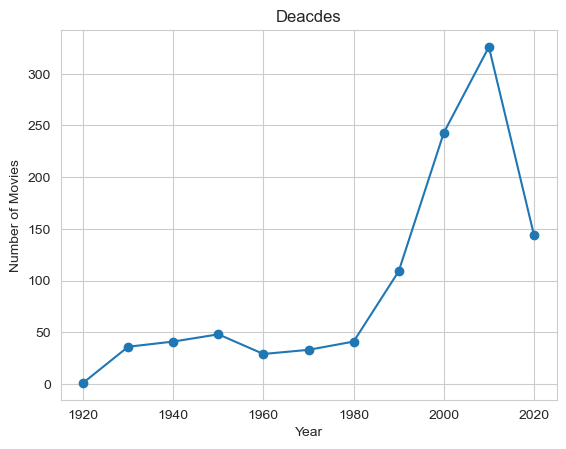

In [30]:
sorted_year_counts.plot(kind='line', marker = 'o')

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Deacdes')

plt.show()

This supports what the correlation suggested, that the majority of movies were produced after 2000.